In [1]:
# Library imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the datasets from csv files
dataset_2 = pd.read_csv("dataset_2.csv")
dataset_4 = pd.read_csv("dataset_4.csv")
dataset_10 = pd.read_csv("dataset_10.csv")
dataset_20 = pd.read_csv("dataset_20.csv")
dataset_100 = pd.read_csv("dataset_100.csv")

# Convert the datasets to numpy arrays
dataset_2 = dataset_2.to_numpy()
dataset_4 = dataset_4.to_numpy()
dataset_10 = dataset_10.to_numpy()
dataset_20 = dataset_20.to_numpy()
dataset_100 = dataset_100.to_numpy()

datasets = [dataset_2, dataset_4, dataset_10, dataset_20, dataset_100]

# Describing and Visualizing the Data

First, we will use Principal Component Analysis to reduce the dimensionality of the datasets to 2D. Then we shall visualize the data points in 2D using a scatter plot.

Since the data is yet unclustered, the scatter plot is expected to be messy, especially for higher-dimensional datasets.

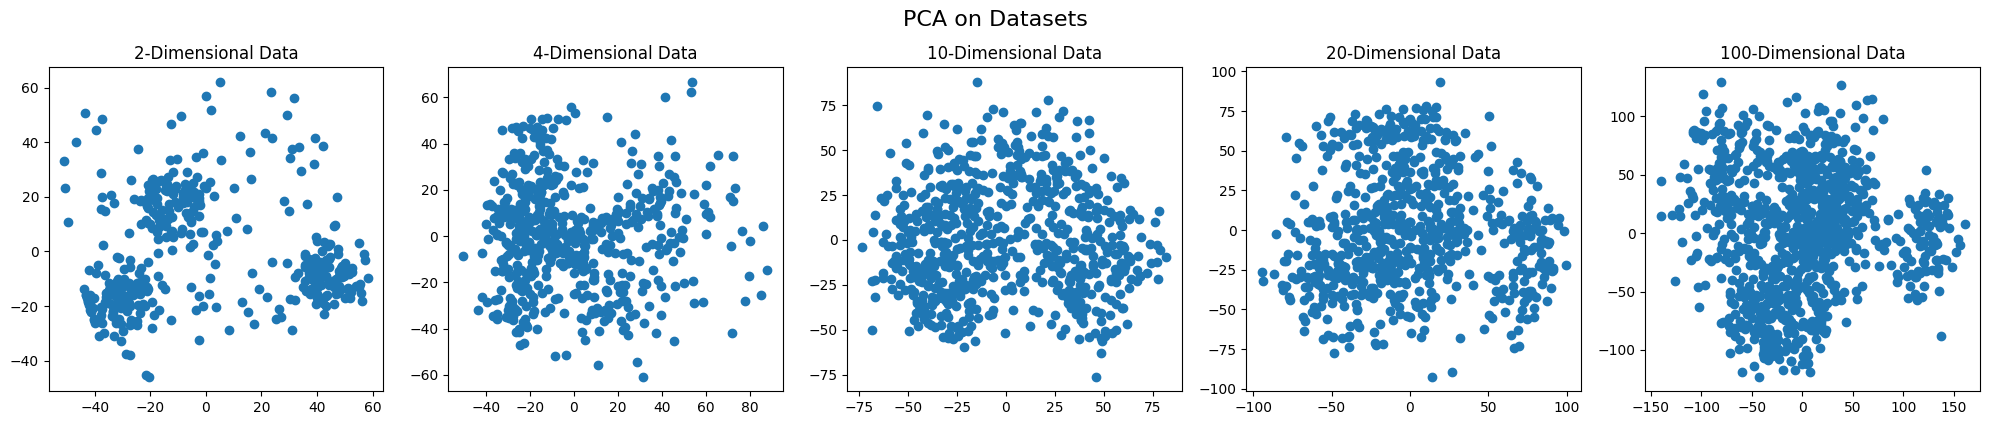

In [3]:
from sklearn.decomposition import PCA

titles = ["2-Dimensional Data", "4-Dimensional Data", "10-Dimensional Data", "20-Dimensional Data", "100-Dimensional Data"]

# Initialize PCA
pca = PCA(n_components=2)

# Create a figure with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop over datasets and plot each one
for i, dataset in enumerate(datasets):
    dataset_pca = pca.fit_transform(dataset)
    axes[i].scatter(dataset_pca[:, 0], dataset_pca[:, 1])
    axes[i].set_title(titles[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.suptitle("PCA on Datasets", y=1.05, fontsize=16)
plt.show()

For the sake of completeness, we will also visualize the first 2 dimensions of the datasets using a scatter plot.

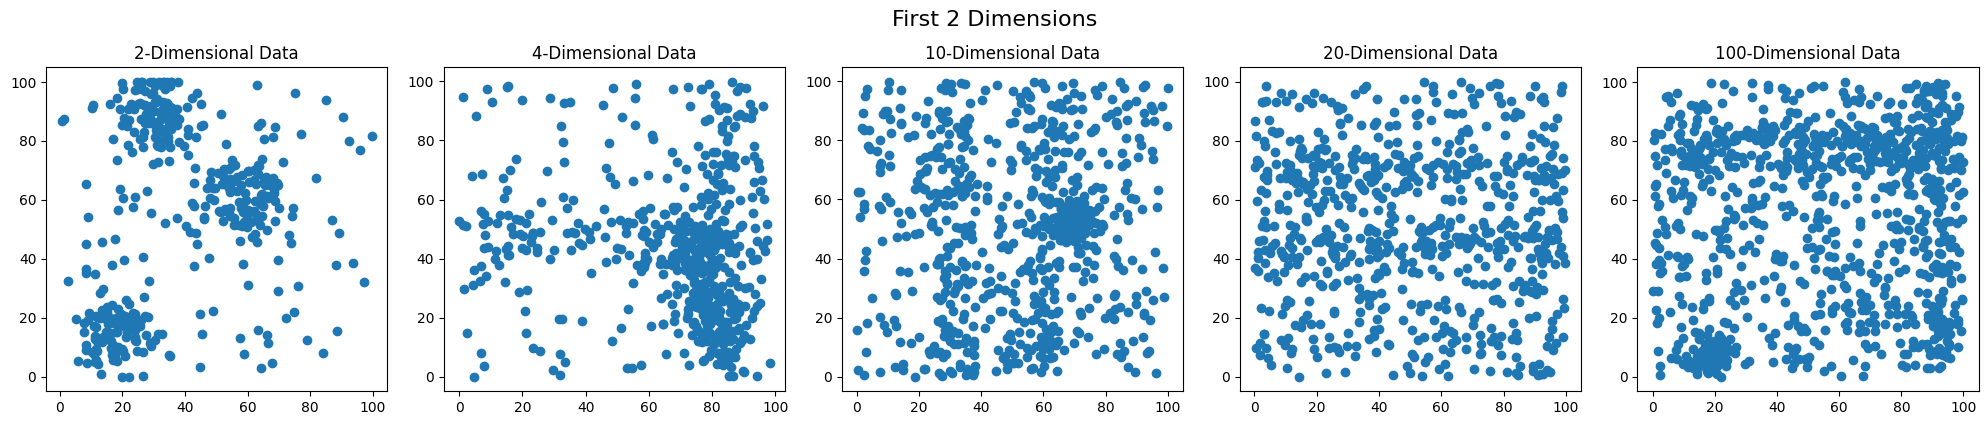

In [4]:
import matplotlib.pyplot as plt

titles = ["2-Dimensional Data", "4-Dimensional Data", "10-Dimensional Data", "20-Dimensional Data", "100-Dimensional Data"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop over datasets and plot each one
for i, dataset in enumerate(datasets):
    axes[i].scatter(dataset[:, 0], dataset[:, 1])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.suptitle("First 2 Dimensions", y=1.05, fontsize=16)
plt.show()

As can be seen, the scatter plots still become messier as the number of dimensions increases. The odds of the first 2 dimensions capturing the underlying structure of the data are slim.

This is in large part because the proportion of the dimensions that are relevant to the clustering task is low.

- In the first dataset, the only 2 dimensions are also the only ones relevant
- In the second dataset (4 dimensions), one of the dimensions (chosen randomly) becomes irrelevant (i.e. 25%)
- In the third dataset (10 dimensions), half of the dimensions are irrelevant
- In the fourth dataset (20 dimensions), 65% are irrelevant
- In the final dataset (100 dimensions), 80% are irrelevant

Now we will use multi-dimensional scaling to visualize the data points in 2D.

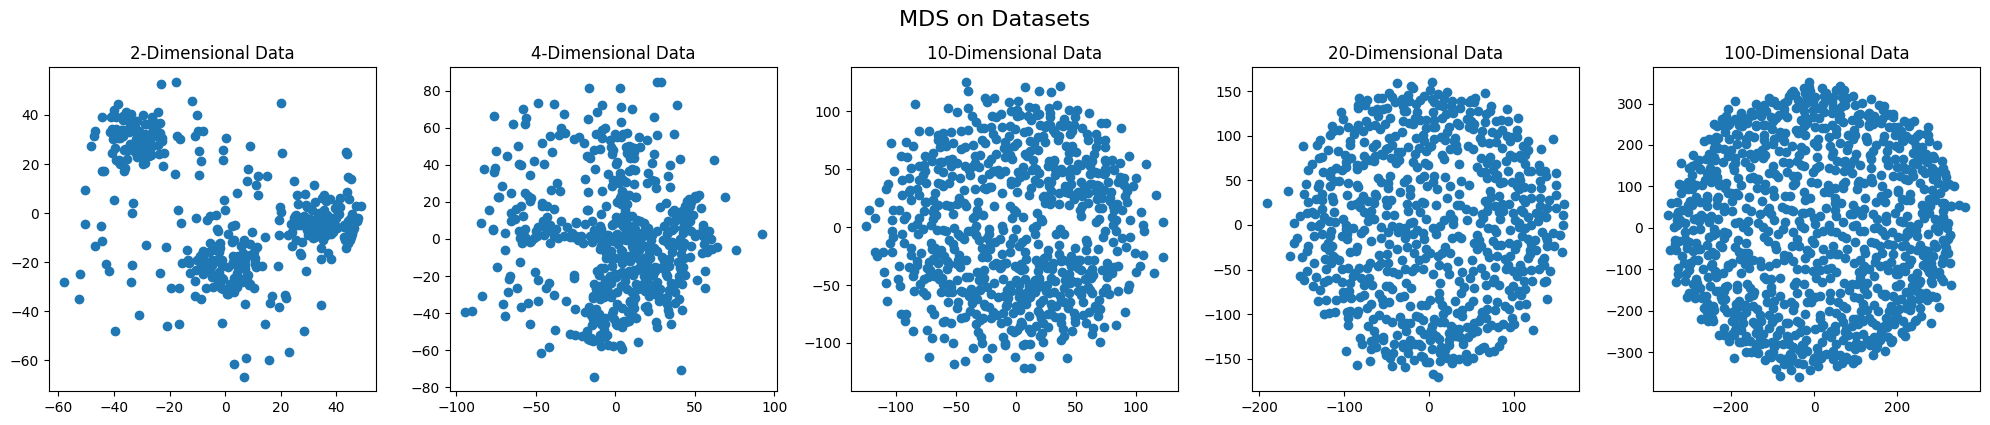

In [5]:
from sklearn.manifold import MDS

titles = ["2-Dimensional Data", "4-Dimensional Data", "10-Dimensional Data", "20-Dimensional Data", "100-Dimensional Data"]

# Initialize MDS
mds = MDS(n_components=2)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop over datasets and plot each one
for i, dataset in enumerate(datasets):
    dataset_mds = mds.fit_transform(dataset)
    axes[i].scatter(dataset_mds[:, 0], dataset_mds[:, 1])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.suptitle("MDS on Datasets", y=1.05, fontsize=16)
plt.show()

As can be seen from the results, the data points are not well-separated in 2D. This visualization was done only for the sake of completeness, to reflect the same approach taken at slide 20 of the 3rd lecture.

Now we will complete the aforementioned approach by computing the distance metrics between the data points, and plotting them as a line graph.

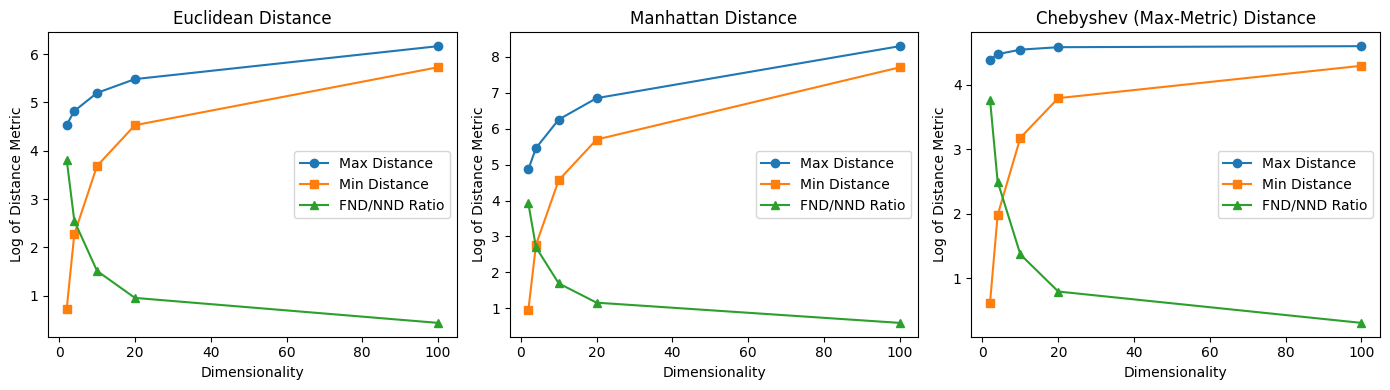

In [6]:
from src.distance_computer import farthest_neighbor_distance, nearest_neighbor_distance, fnd_nnd_ratio

x = [2, 4, 10, 20, 100]

# Euclidean distance metrics
y_max_euclidean = [farthest_neighbor_distance(dataset, 'euclidean') for dataset in datasets]
y_min_euclidean = [nearest_neighbor_distance(dataset, 'euclidean') for dataset in datasets]
y_mean_euclidean = [fnd_nnd_ratio(dataset, 'euclidean') for dataset in datasets]

# Manhattan distance metrics
y_max_manhattan = [farthest_neighbor_distance(dataset, 'manhattan') for dataset in datasets]
y_min_manhattan = [nearest_neighbor_distance(dataset, 'manhattan') for dataset in datasets]
y_mean_manhattan = [fnd_nnd_ratio(dataset, 'manhattan') for dataset in datasets]

# Chebyshev distance metrics
y_max_chebyshev = [farthest_neighbor_distance(dataset, 'chebyshev') for dataset in datasets]
y_min_chebyshev = [nearest_neighbor_distance(dataset, 'chebyshev') for dataset in datasets]
y_mean_chebyshev = [fnd_nnd_ratio(dataset, 'chebyshev') for dataset in datasets]

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot Euclidean distance metrics
axes[0].plot(x, np.log(y_max_euclidean), 'o-', label='Max Distance')
axes[0].plot(x, np.log(y_min_euclidean), 's-', label='Min Distance')
axes[0].plot(x, np.log(y_mean_euclidean), '^-', label='FND/NND Ratio')
axes[0].set_xlabel("Dimensionality")
axes[0].set_ylabel("Log of Distance Metric")
axes[0].set_title("Euclidean Distance")
axes[0].legend()

# Plot Manhattan distance metrics
axes[1].plot(x, np.log(y_max_manhattan), 'o-', label='Max Distance')
axes[1].plot(x, np.log(y_min_manhattan), 's-', label='Min Distance')
axes[1].plot(x, np.log(y_mean_manhattan), '^-', label='FND/NND Ratio')
axes[1].set_xlabel("Dimensionality")
axes[1].set_ylabel("Log of Distance Metric")
axes[1].set_title("Manhattan Distance")
axes[1].legend()

# Plot Chebyshev distance metrics
axes[2].plot(x, np.log(y_max_chebyshev), 'o-', label='Max Distance')
axes[2].plot(x, np.log(y_min_chebyshev), 's-', label='Min Distance')
axes[2].plot(x, np.log(y_mean_chebyshev), '^-', label='FND/NND Ratio')
axes[2].set_xlabel("Dimensionality")
axes[2].set_ylabel("Log of Distance Metric")
axes[2].set_title("Chebyshev (Max-Metric) Distance")
axes[2].legend()

plt.tight_layout()
plt.show()

Now we shall partition the data space into a regular grid, with 4 cells in each dimension. We will then compute the number of cells covering one object, two objects, and so on.

Finally, we will plot the number of such cells as a histogram.

{1: 16, 2: 16, 3: 15, 4: 14, 5: 14, 6: 13, 7: 13, 8: 12, 9: 9, 10: 8, 11: 8, 12: 7, 13: 6, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 19: 6, 20: 5, 21: 5, 22: 5, 23: 4, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 2, 88: 2, 89: 1, 0: 0}
{1: 144, 2: 70, 3: 45, 4: 36, 5: 30, 6: 24, 7: 23, 8: 21, 9: 20, 10: 18, 11: 17, 12: 15, 13: 13, 14: 11, 15: 11, 16: 11, 17: 10, 18: 9, 19: 6, 20: 4, 21: 3, 22: 3, 23: 2, 24: 2, 25: 1, 26: 1, 0: 112}
{1: 692, 2: 8, 0: 1047884}
{1: 700, 0: 1099511627076}
{1: 1000, 0: 1606938044258990275541962092341162602522202993782792835300376}


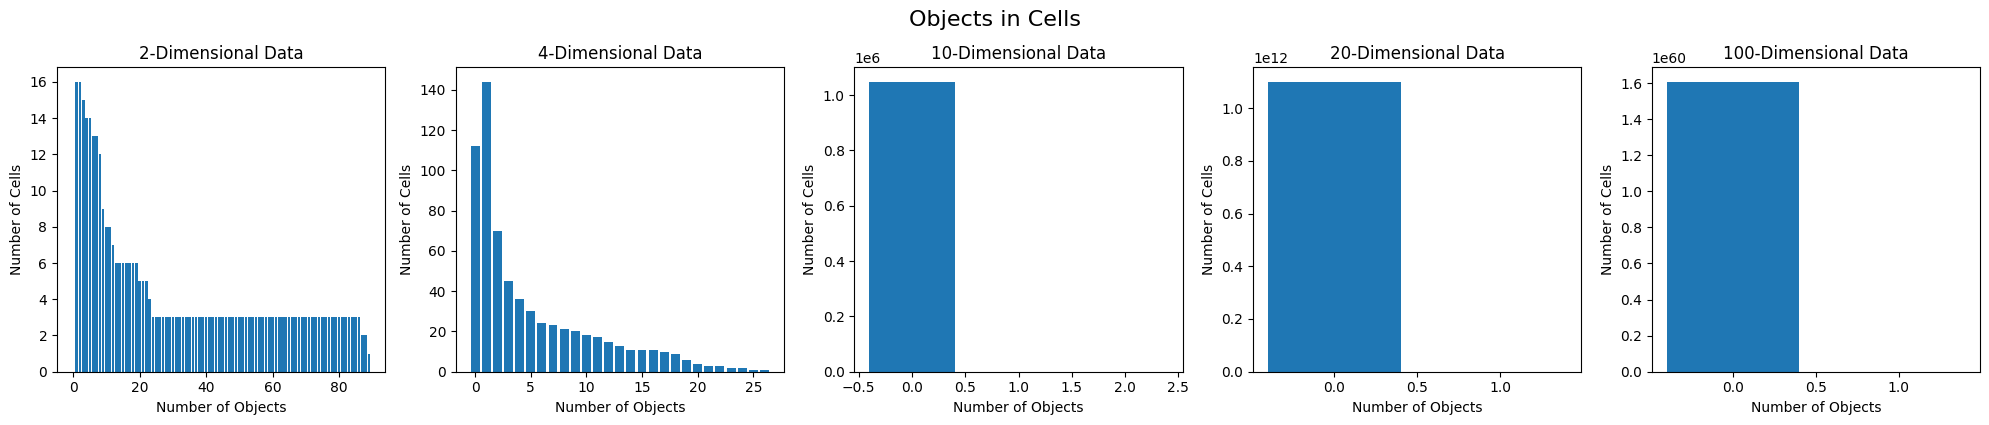

In [7]:
from src.cells_calculator import compute_cells, compute_objects

cells_2 = compute_cells(dataset_2, 4)
cells_4 = compute_cells(dataset_4, 4)
cells_10 = compute_cells(dataset_10, 4)
cells_20 = compute_cells(dataset_20, 4)
cells_100 = compute_cells(dataset_100, 4)

objects_2 = compute_objects(cells_2, 4, 2)
objects_4 = compute_objects(cells_4, 4, 4)
objects_10 = compute_objects(cells_10, 4, 10)
objects_20 = compute_objects(cells_20, 4, 20)
objects_100 = compute_objects(cells_100, 4, 100)

print(objects_2)
print(objects_4)
print(objects_10)
print(objects_20)
print(objects_100)

# Then plot the number of objects for each dataset as a histogram
# Each objects_n variable calculated by compute_objects is a dictionary with keys as the number of objects and values as the number of cells with that many objects

objects = [objects_2, objects_4, objects_10, objects_20, objects_100]
titles = ["2-Dimensional Data", "4-Dimensional Data", "10-Dimensional Data", "20-Dimensional Data", "100-Dimensional Data"]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Loop over objects_n and plot each one
for i, objects_n in enumerate(objects):
    axes[i].bar(objects_n.keys(), objects_n.values())
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Number of Objects")
    axes[i].set_ylabel("Number of Cells")

plt.tight_layout()
plt.suptitle("Objects in Cells", y=1.05, fontsize=16)
plt.show()

In the 2-dimensional dataset, most cells contain at least one object. Interstingly, absolutely no cells contain no objects.

The number starts to increase in the 4-dimensional dataset, where about 112 cells (or about 44% of all cells) contain no objects.

Starting from the 10-dimensional dataset, the data points are no longer well-separated. Only a few cells cover two objects (only 8 in our dataset), and some also cover one object (692 cells in our dataset). Most cells cover no objects at all (99.99% in our dataset).

From the 20-dimensional dataset onwards, the data points are no longer well-separated. Only 700 cells cover one object in the 20-dimensional dataset, and only 1000 cells cover one object in the 100-dimensional dataset. The overwhelming majority of cells in these datasets cover absolutely no objects.

This is the curse of dimensionality in action. As the number of dimensions increases, the data points become more sparse, and the number of cells covering multiple objects reduces. This makes it harder to cluster the data points.

Now we will perform a hypercube range query with a side length of s = 0.1. We will then plot the fraction of objects captured by the query as a function of the number of dimensions.

[291, 289, 117, 6, 0]
[400, 550, 700, 700, 1000]


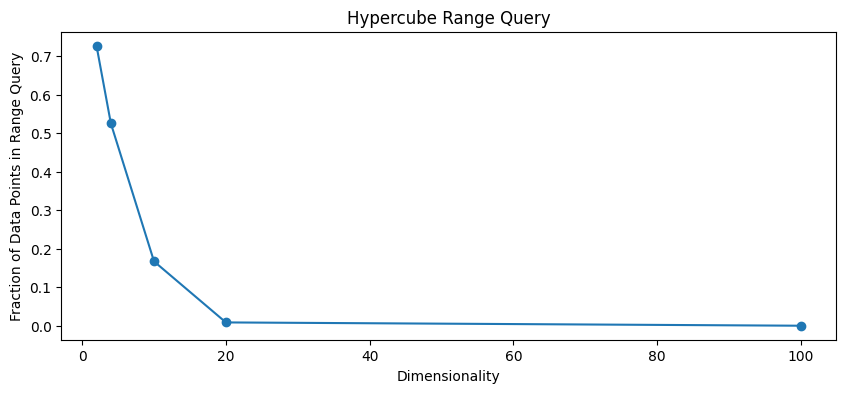

In [8]:
def hypercube_range_query(dataset, length):
    # Normalize the dataset
    dataset = (dataset - dataset.min(axis=0)) / (dataset.max(axis=0) - dataset.min(axis=0))
    # Define the query point
    query_point = np.array([0.5] * dataset.shape[1])
    # Define the query range
    query_range = np.array([length / 2] * dataset.shape[1])
    # Find the indices of the points within the range
    indices = np.where(np.all(np.abs(dataset - query_point) <= query_range, axis=1))[0]
    return indices

length = 0.8
queries = [hypercube_range_query(dataset, length) for dataset in datasets]
print([len(query) for query in queries])
print([len(dataset) for dataset in datasets])

fractions = [len(query) / len(dataset) for query, dataset in zip(queries, datasets)]

# Define the size of the plot
plt.figure(figsize=(10, 4))
plt.plot(x, fractions, 'o-')
plt.xlabel("Dimensionality")
plt.ylabel("Fraction of Data Points in Range Query")
plt.title("Hypercube Range Query")
plt.show()

As can be seen, the fraction of objects captured by the query decreases as the number of dimensions increases. This is because the data points become more sparse as the number of dimensions increases. In fact, the fraction of objects captured by the query decreases exponentially with the number of dimensions.

For example, in the case of 20 dimensions, only 6 objects are captured by the query, i.e. less than 1% of all data points. In the case of 100 dimensions, no objects are captured by the query.

Now we will apply some conventional full-space clustering algorithms to the datasets, and compare their performance.

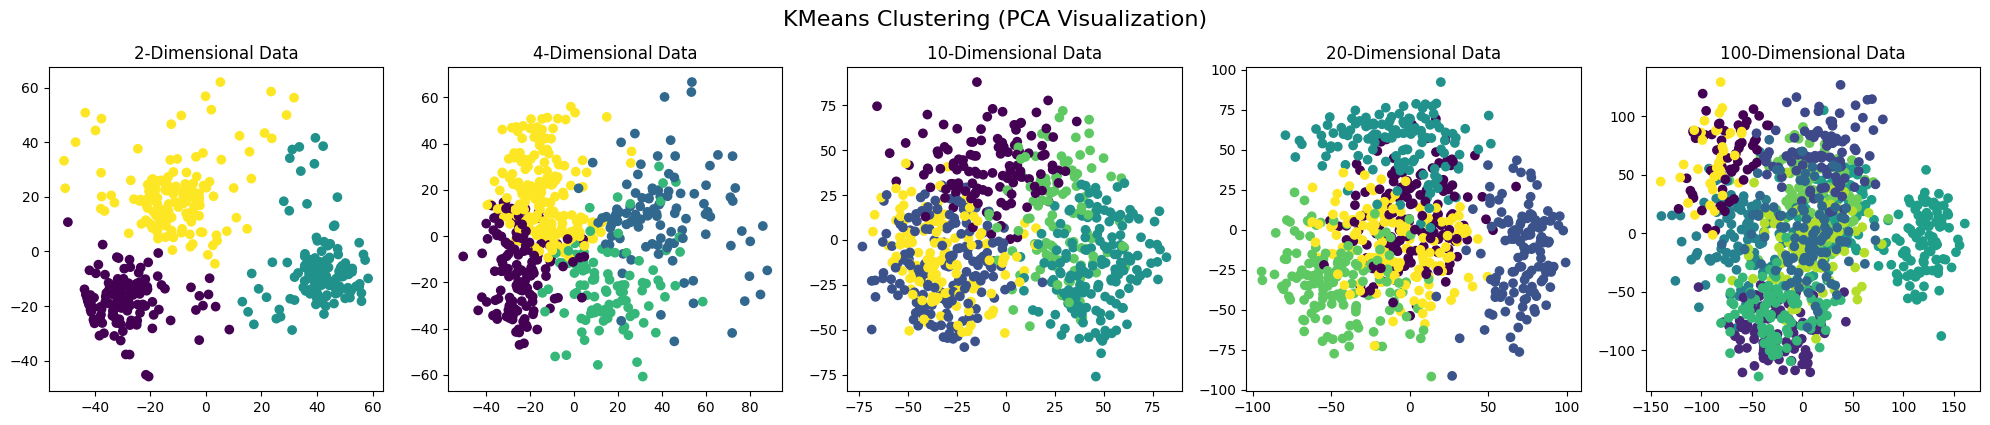

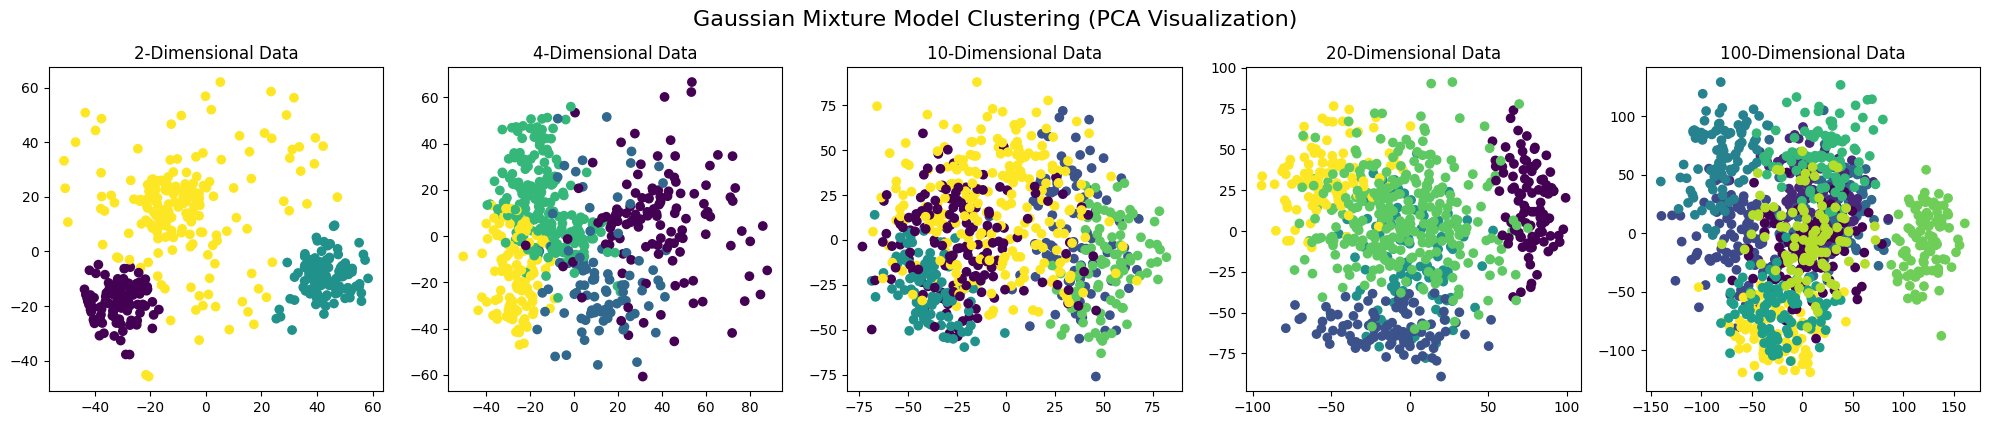

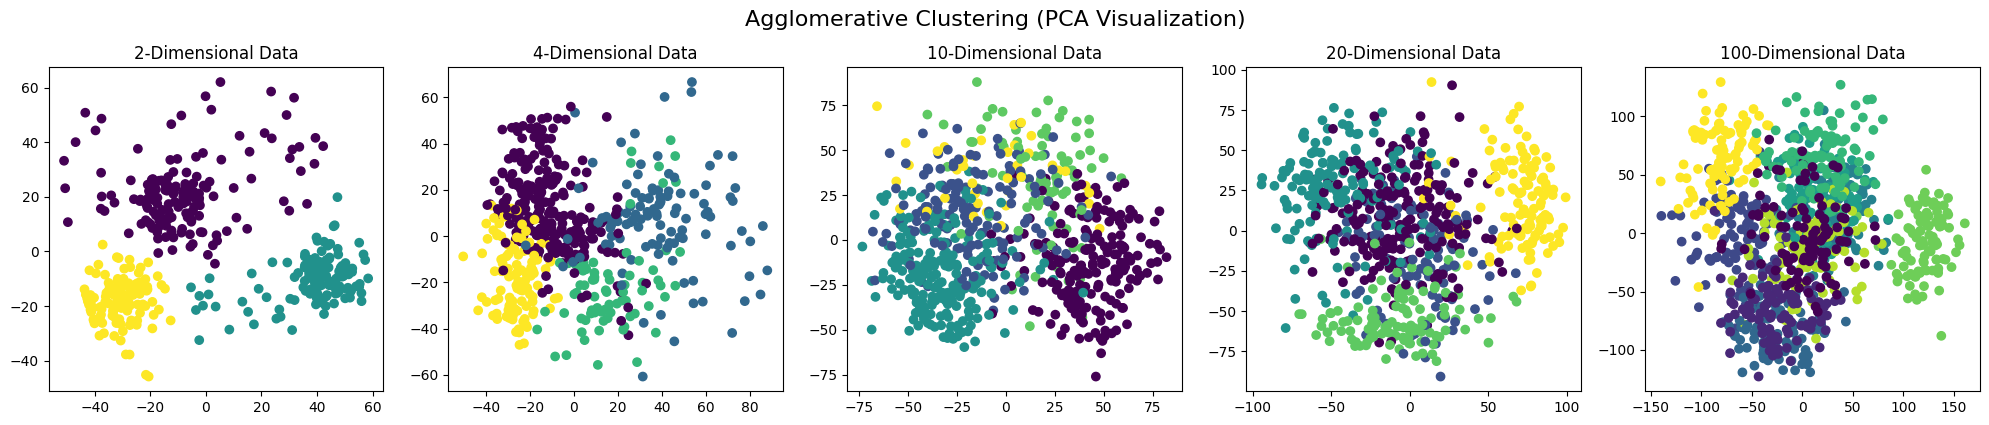

In [9]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

titles = ["2-Dimensional Data", "4-Dimensional Data", "10-Dimensional Data", "20-Dimensional Data", "100-Dimensional Data"]

# Remember that we created 3 clusters in dataset_2, 4 clusters in dataset_4, 5 clusters in dataset_10, 5 clusters in dataset_20, and 10 clusters in dataset_100
clusters = [3, 4, 5, 5, 10]


# K-Means Clustering
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, dataset in enumerate(datasets):
    # Fit the models
    kmeans = KMeans(clusters[i])
    kmeans.fit(dataset)

    # Transform the data using PCA
    pca = PCA(n_components=2)
    dataset_pca = pca.fit_transform(dataset)

    axes[i].scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=kmeans.labels_)
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.suptitle("KMeans Clustering (PCA Visualization)", y=1.05, fontsize=16)
plt.show()


# Gaussian Mixture Model
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, dataset in enumerate(datasets):
    gmm = GaussianMixture(clusters[i])
    gmm.fit(dataset)

    pca = PCA(n_components=2)
    dataset_pca = pca.fit_transform(dataset)

    axes[i].scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=gmm.predict(dataset))
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.suptitle("Gaussian Mixture Model Clustering (PCA Visualization)", y=1.05, fontsize=16)
plt.show()


# Agglomerative Clustering
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, dataset in enumerate(datasets):
    agg = AgglomerativeClustering(clusters[i])
    agg.fit(dataset)

    pca = PCA(n_components=2)
    dataset_pca = pca.fit_transform(dataset)

    axes[i].scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=agg.labels_)
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.suptitle("Agglomerative Clustering (PCA Visualization)", y=1.05, fontsize=16)
plt.show()